<a href="https://colab.research.google.com/github/sakshibisht5/FundFlow-project/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
house_price_dataset = sklearn.datasets.fetch_california_housing()
print(house_price_dataset)
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)
house_price_dataframe.head()


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
house_price_dataframe.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [15]:
house_price_dataframe.head(20)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [18]:
house_price_dataframe['price'] =  house_price_dataset.target
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
house_price_dataframe.shape

(20640, 9)

In [20]:
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [21]:
house_price_dataframe.max()

,0
MedInc,15.000100
HouseAge,52.000000
AveRooms,141.909091
AveBedrms,34.066667
Population,35682.000000
AveOccup,1243.333333
Latitude,41.950000
Longitude,-114.310000
price,5.000010


In [22]:
house_price_dataframe.min()

,0
MedInc,0.499900
HouseAge,1.000000
AveRooms,0.846154
AveBedrms,0.333333
Population,3.000000
AveOccup,0.692308
Latitude,32.540000
Longitude,-124.350000
price,0.149990


In [23]:
correlation = house_price_dataframe.corr()

<Axes: >

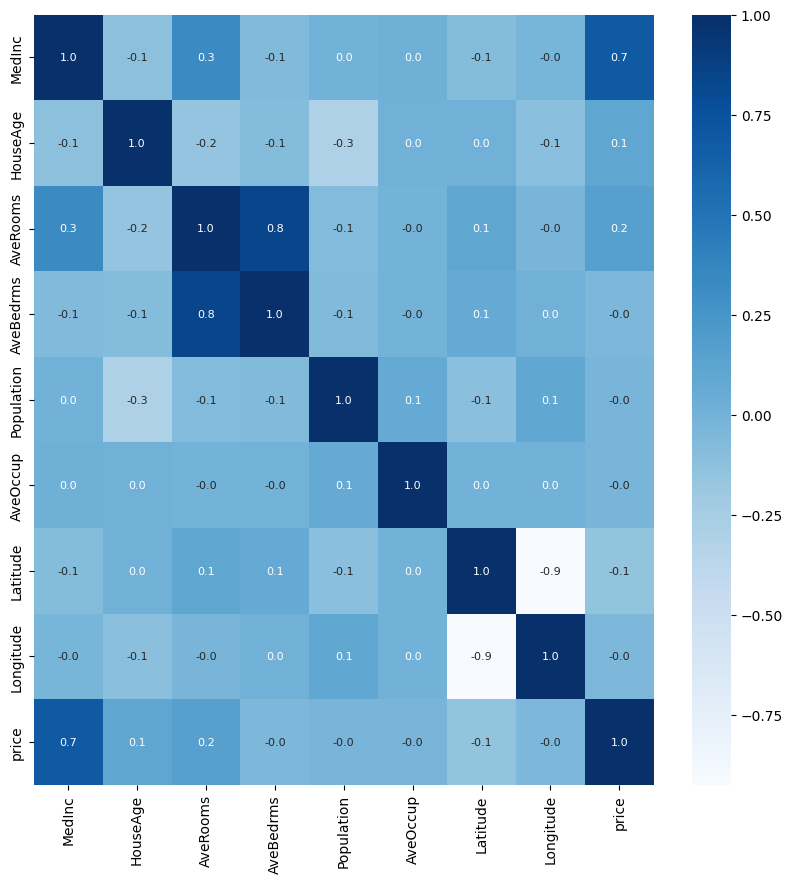

In [28]:
#contructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot= True,annot_kws={'size':8},cmap='Blues')

In [29]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [30]:
print(X,Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
...       ...       ...       ...        ...         ...       ...       ...        ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43    -121.32
20639  2.3886      16.0  5.25471

In [31]:
#spliting data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)
